<div style="font-size:16pt" font-weight="bold"><strong>Python for  Statistics</strong></div>
<br>
This note is based on  "Mastering python for data science", Samir Madhavan, PACKT, 2015.(MP4DS) and wikipedia. 

<div style="font-size:14pt" font-weight="bold">1. Various forms of distributions</div>

<div style="font-size:14pt" font-weight="bold">1.1 Binomial distribution and normal distribution</div>
A Binomial distribution has the following probability density function:
\begin{equation}
P(x) = \frac{n!}{x!(n-x)!}p^x q^{n-x}
\end{equation}
<br>
where x is the number of successes when flipping a fair coin, n is the number of sample sizes, p is the probability of success and q is (1-p).<br><br>
If the sample sizes are large enough, the shape of Binomial distribution will be quite similar to Normal distributon. The difference is that a Binomial distribution is a discrete distribution (It has a probability mass function: pmf), while Normal distribution is a continuous distrbution (It has a probability distribution function: pdf).<br><br>
We can use SciPy packages for statstical computations. See here for details: https://www.scipy.org/

In [1]:
# import relavent libraries
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

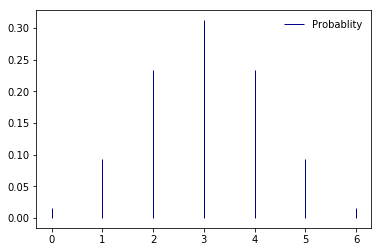

In [103]:
fig, ax = plt.subplots(1,1)
x = [0, 1, 2, 3, 4, 5, 6] # The number of getting head whn flipping a fair coin six times. 
n = 6
p = 0.5 # prob. of head
rv = binom(n,p) # generating binomial distribution

ax.vlines(x, 0, rv.pmf(x), colors='darkblue', linestyles='-', lw=1,label='Probablity') # ax.vlines plot vertical lines. rv.pmf retunrs the pmf of x
ax.legend(loc='best', frameon=False) # frameon=False removes the frame from the legend
plt.show() 

In [15]:
rv.pmf(3) # The probability of having 3 heads per 6 tosses

0.3125000000000002

In [33]:
for i, prob in enumerate([rv.pmf(i) for i in range(0,7,1)]):
    print(i ,": ", round(prob*100,2), "%") 

0 :  1.56 %
1 :  9.38 %
2 :  23.44 %
3 :  31.25 %
4 :  23.44 %
5 :  9.38 %
6 :  1.56 %


In [36]:
np.sum([rv.pmf(i) for i in range(0,7,1)]) # The sum is one

1.0000000000000002

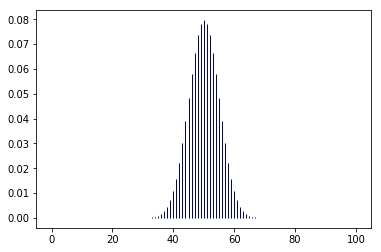

In [102]:
# Increase the number of attemps
fig, ax = plt.subplots(1,1)
x = range(101) # range function generates sequene of integers from 0 to 100
n = 100 # flip a fair coin 100 times
p = 0.5
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x),  colors='darkblue', linestyles='-', lw=1, label='Probablity')

In [41]:
# Use list to extract values from a range object
list(range(11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [45]:
#for i, prob in enumerate([rv.pmf(i) for i in range(0,101,1)]):
#    print(i ,": ", round(prob*100,2), "%") 

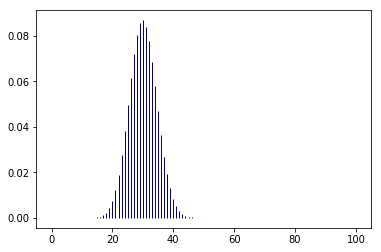

In [101]:
# Change the probability of success to 0.3
fig, ax = plt.subplots(1,1)
x = range(101) # range function generates sequene of integers from 0 to 100
n = 100 # flip a fair coin 100 times
p = 0.3
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x),  colors='darkblue', linestyles='-', lw=1, label='Probablity')

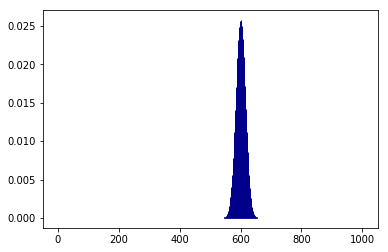

In [100]:
# Change the probability of success to 0.6
fig, ax = plt.subplots(1,1)
x = range(1001) # range function generates sequene of integers from 0 to 1000
n = 1000 # flip a fair coin 1000 times
p = 0.6
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x),  colors='darkblue', linestyles='-', lw=1, label='Probablity')

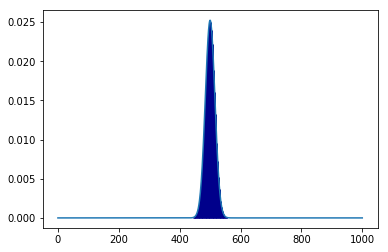

In [106]:
# Flip 1,000 times
fig, ax = plt.subplots(1,1)
x = range(1001) # range function generates sequene of integers from 0 to 100
n = 1000 # flip a fair coin 100 times
p = 0.5
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x),  colors='darkblue', linestyles='-', lw=1, label='Probablity')
ax.plot(x, stats.norm(500,rv.std()).pdf(x)) # The light blue line is a normal distribtion which has same mean and variance

<hr>

<div style="font-size:14pt" font-weight="bold">1.2 Poisson distribution</div>
<br><br>
A poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. <br><br>

The pmf of poisson distribution is as follows:
\begin{equation}
    f(x;\lambda) = P(\: \text{k events in the interval} \:) = \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation}    
<br>
where k = 0,1,2... is the number of events in the interval, and $\lambda$ is the average number of events per interval. 
<br>
reference:  <a href ="https://en.wikipedia.org/wiki/Poisson_distribution">https://en.wikipedia.org/wiki/Poisson_distribution</a>

In [55]:
# The number of phone calls in an hour is 10. What is the probability of having 15 calls in the next hour.

from scipy.stats import poisson
rv = poisson(10) #lambda (average number per interval)
rv.pmf(15) # .pmf returns the probability

0.034718069630684245

<hr>

<div style="font-size:14pt" font-weight="bold">1.3 Bernoulli distribution</div>

A Bernoulli distribution is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$. The probability mass function is as follows:<br>
\begin{equation}
P(n) = 
\begin{cases} 
 1 - p & \textrm{for n = 0}\\
 p & \textrm{for n = 1}
\end{cases}
\end{equation}
<br>
It can be also written like:
\begin{equation}
P(n) = p^n(1-p)^{1-n}
\end{equation}

reference : https://en.wikipedia.org/wiki/Bernoulli_distribution

In [10]:
from scipy import stats
outcome = stats.bernoulli.rvs(0.6, size=100)
outcome

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [11]:
import numpy as np
np.sum(outcome) # Because the outcomes are random, the ratio of one in the sample size does not match exatcly to the probability

58

<hr>

<div style="font-size:14pt" font-weight="bold">1.4 Z score</div>

\begin{equation}
Z = \frac{X - \mu}{\sigma}
\end{equation}
<br>
where X is the value in th original distribution, $\mu$ is the mean of them, and $\sigma$ is the standard deviation.

Suppose we have a math test to 100 students. We assume that the score distribution is normal. The mean and standard deviation of the score is assumed to be 65 and 10 respectivey.
We can simulate the distribution by the following code: 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [43]:
random.seed(0)
score = np.random.normal(65,10,100).round() # (mean, std, and sample size)
score

array([79., 56., 75., 53., 77., 57., 73., 76., 71., 77., 75., 62., 63.,
       82., 65., 65., 59., 85., 64., 59., 59., 75., 65., 52., 73., 63.,
       72., 74., 58., 57., 93., 68., 79., 65., 62., 61., 69., 72., 62.,
       51., 56., 86., 69., 63., 70., 50., 63., 69., 74., 50., 72., 72.,
       50., 59., 39., 51., 46., 64., 73., 76., 71., 77., 49., 71., 73.,
       72., 87., 55., 68., 64., 54., 68., 58., 50., 65., 55., 63., 70.,
       79., 61., 60., 57., 66., 68., 64., 65., 64., 71., 76., 85., 58.,
       62., 68., 70., 66., 67., 56., 86., 69., 71.])

In [44]:
score.mean() # sample mean

66.14

In [45]:
score.std() # sample standard deviation

9.94386242865417

(array([0.00462963, 0.        , 0.        , 0.00462963, 0.00462963,
        0.02777778, 0.01388889, 0.02314815, 0.02777778, 0.02314815,
        0.02777778, 0.0462963 , 0.04166667, 0.04166667, 0.03703704,
        0.04166667, 0.02314815, 0.02777778, 0.01388889, 0.00462963,
        0.        , 0.01851852, 0.00462963, 0.        , 0.00462963]),
 array([39.  , 41.16, 43.32, 45.48, 47.64, 49.8 , 51.96, 54.12, 56.28,
        58.44, 60.6 , 62.76, 64.92, 67.08, 69.24, 71.4 , 73.56, 75.72,
        77.88, 80.04, 82.2 , 84.36, 86.52, 88.68, 90.84, 93.  ]),
 <a list of 25 Patch objects>)

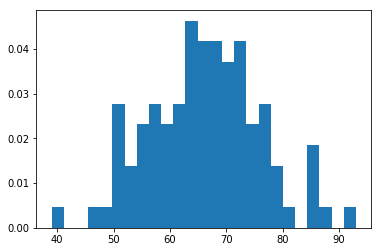

In [47]:
plt.hist(score, bins=25, normed = True) # "normed = True" returns a density curve. The integral of all possible x = 1

In [48]:
# standardize the scores
import scipy.stats as stats

In [26]:
# stats.zscore(score)

In [52]:
# Zscore function is standardized by sample mean and std
print("Standardized by sample mean and std?: ", 1.29326005*score.std() + score.mean())
print("Standardized by population mean and std?: ", 1.29326005*10 + 65)

Standardized by sample mean and std?:  79.00000002167441
Standardized by population mean and std?:  77.9326005


In [2]:
# [(i-65.0)/10.0 for i in score]

In [54]:
prob = 1 - stats.norm.cdf(1.29326005) # The Z score of 79 is 1.29326005. We pass it the cdf function 
prob # This is the probability that makes above 79.

0.09796056642274564

In [55]:
# Determnining the top 10% Z score
stats.norm.ppf(0.9)

1.2815515655446004

In [56]:
# Convert the Z score to the original distribution
1.2815515655446004*score.std() + score.mean() 

78.88357246300188

<hr>

<div style="font-size:14pt" font-weight="bold">2.1 Normal (Z) distribution vs t-distribution</div>
<br> 
A t-distribution is similar to a normal (Z) distribtion. However, it has fatter tail and flatter around the center than the normal distribution.

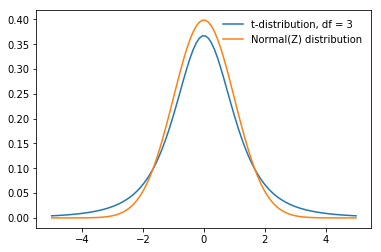

In [94]:
# generate x values
x = np.linspace(-5,5,100)

# create t distibution object with digree of freedom = 3
df_t = stats.t(3)

# Draw the pdf of t-distribuion and normal distribution 
plt.plot(x, df_t.pdf(x), label = "t-distribution, df = 3")
plt.plot(x, norm.pdf(x), label = "Normal(Z) distribution")
plt.legend(loc='best', frameon=False)

The t-test under t-distribution is used to compare the sample mean against the population mean. We should not use the normal distribution in this case unless the sample sizez is large enough. 

<hr>

<div style="font-size:14pt" font-weight="bold">2.2 t-statistics</div>
<br>
In statistics, the t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. It is used in hypothesis testing via Student's t-test. For example, it is used in estimating the population mean from a sampling distribution of sample means if the population standard deviation is unknown.
<br><br>
Suppose we have a sample distibution whose population distribution is normal: $N(\mu, \sigma^2)$. We don't know the population mean $\mu$ and population standard deviation $\sigma$. When thinking about the following hypothesis(Step 1),
<ul>
    <li> Null hypothesis: $H_0 : \mu = \mu_0$
    <li> Alternative hypothesis: $H_1 : \mu < \mu_0$ 
</ul>        

<br><br> 
In the next step, we define the level of significance $\alpha$ (= 0.05 for example) (Step 2). 
<br><br>
we know that the following t-statistics follows a Student's t-distribution with $n-1$ degree of freedom (Step 4).<br><br> 
\begin{equation}
t = \frac{\bar{x}-\mu_0}{\frac{\hat{\sigma}}{\sqrt{n}}}
\end{equation}
<br>
where $\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i$ is the sample mean(Step 3) and $\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n}(x_i-\bar{x})^2$ is the sample variance(Step 3).
<br><br>
P-value or probability value is, for a given statistical model, the probability that, when the null hypothesis is true, the statistical summary would be equal to, or more extreme than, the actual observed results. In this case, the p value is  $p = Pr(T > t)$.We use t-table to find the p-value of t-statitstics.If $p \leq \alpha$, we reject the null hypothesis. Ohteriwse, we passively accept the null hypothesis(Step 5).
<br>
<br>
reference:
<ul>
    <li>https://en.wikipedia.org/wiki/T-statistic#targetText=In%20statistics%2C%20the%20t%2Dstatistic,testing%20via%20Student's%20t%2Dtest.
<li>https://en.wikipedia.org/wiki/P-value
</ul>    

In [9]:
# Suppose we have a sample from unknown distribution N(50, 10^2). 
# Can we state that the population mean is 68?
# Null Hypothesis H_0: mu = 68, Altenative Hypothes H_1: mu < 68 (Step1)
# Set the significance level alpha = 0.05 (Step2)
score = np.random.normal(50,10,100).round() # score is our normal sample. variables are (mean, std, and sample size)

stats.ttest_1samp(score,popmean=68) # apply t-test (step 3,4,5)

Ttest_1sampResult(statistic=-18.986359633320752, pvalue=9.040725011725997e-35)

We found that pvalue is less than $\alpha = 0.05$. We reject the null hypothesis (step5).<br> 
This is an example of one-tailed test. In a two-tailed test ($H_1: \mu \neq 68$), when the level of significance is 0.05, each side has 0.025.

In [62]:
# step 3 and step 4, not using a library
# .var devides by n not by n-1. We have to divide the sqrt of it by n-1 to calculate the t-value
(score.mean() - 68)/np.sqrt(score.var()/(len(score)-1))   

-14.684634034091598

There are two types of error in a hypothesis test.
<ol>
    <li>Type 1 error: Rejecting the Null hypothesis when the Null hypothesis is True.
    <li>Type 2 error: Accepting the Null hypothessi when the Null hypothesis is False.    
</ol>    

<hr>

<div style="font-size:14pt" font-weight="bold">2.3 Standard error and confidence interval</div>
<br>
A confidence interval is an interval at which the population mean can be defined.

In [25]:
# Suppose we have sample lengh data of 50 pomskys and want to determine the 95% confidence interval of the mean of population.
# Code to generate synthetic data: pom_height = np.random.normal(14.5,1.5,50).
# Suppose we don't know the population mean and varianve

In [3]:
pom_height = np.array([13.78704687, 12.80437584, 12.61213547, 16.60561478, 16.04321627,
       16.10802773, 17.03063469, 13.10050271, 14.25787495, 11.61665264,
       14.10335509, 11.96093648, 14.57194738, 16.00151549, 16.48994858,
       13.10516601, 12.82920909, 14.28485904, 15.14782206, 14.54971323,
       15.38656485, 16.45455016, 14.72714213, 13.40554188, 12.19683747,
       13.34414406, 13.89698177, 14.06191471, 14.14415435, 14.06620691,
       14.0994669 , 17.6763056 , 12.29828235, 11.64966811, 15.26770362,
       15.90137592, 10.71797262, 13.74040759, 14.41463527, 11.96465577,
       15.07475022, 12.88626736, 10.79831496, 15.4743646 , 16.78947807,
       14.59977992, 15.54180914, 15.79961476, 16.00997633, 13.11413979])

(array([0.1724551 , 0.        , 0.        , 0.08622755, 0.08622755,
        0.1724551 , 0.1724551 , 0.        , 0.1724551 , 0.1724551 ,
        0.25868265, 0.1724551 , 0.        , 0.25868265, 0.43113775,
        0.25868265, 0.25868265, 0.08622755, 0.08622755, 0.1724551 ,
        0.25868265, 0.08622755, 0.3449102 , 0.08622755, 0.1724551 ,
        0.08622755, 0.08622755, 0.08622755, 0.        , 0.08622755]),
 array([10.71797262, 10.94991705, 11.18186149, 11.41380592, 11.64575035,
        11.87769478, 12.10963922, 12.34158365, 12.57352808, 12.80547251,
        13.03741695, 13.26936138, 13.50130581, 13.73325024, 13.96519468,
        14.19713911, 14.42908354, 14.66102798, 14.89297241, 15.12491684,
        15.35686127, 15.58880571, 15.82075014, 16.05269457, 16.284639  ,
        16.51658344, 16.74852787, 16.9804723 , 17.21241673, 17.44436117,
        17.6763056 ]),
 <a list of 30 Patch objects>)

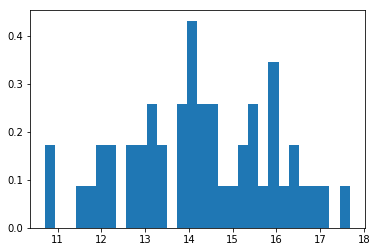

In [4]:
# plotting the distribution
plt.hist(pom_height, 30, density = True)

In [6]:
# The mean of the distribution ( = Sample mean)
print(pom_height.mean(), "inches")

14.2502712318 inches


The standard error(SE) of the mean is the deviation of the sample mean from the population mean:
<br><br>
\begin{equation}
 \sigma_{\bar{x}}  \approx \frac{s}{\sqrt{n}}
\end{equation}
<br>
where
s is the sample standard deviation (i.e., the sample-based estimate of the standard deviation of the population), and
n is the size (number of observations) of the sample. This is an approximation because we don't know the population standard deviation.

In [7]:
# calculate the standard erro using sem() function of the SciPy
se = stats.sem(pom_height)
se

0.2375595117749731

The standard error of the mean is 0.238 inches. <br>The upper limit and the lower limit of $(1-\alpha)\%$ (95% in this case) confidence interval can be determined by the following formula:
<br><br>
\begin{equation}
 \Big(  \bar{x} - t_{\alpha/2}\sqrt{\frac{s^2}{n}} \:,\:  \bar{x} + t_{\alpha/2}\sqrt{\frac{s^2}{n}}    \Big)
\end{equation}
<br>
\begin{equation}
= \Big(  \bar{x} - t_{\alpha/2}SE \:,\:  \bar{x} + t_{\alpha/2}SE    \Big)
\end{equation}
<br><br>
As the sample size increases, the standard error decreases, which means that the confidence interval becomes narrower. 

In [13]:
alpha = 0.95
loc = 0 # mean
scale = 1 # std
a,b = norm.interval(alpha=alpha, loc=loc, scale=scale)
print(a,b)

-1.959963984540054 1.959963984540054


In [11]:
print("Lower interval: ", pom_height.mean() + (a)*se)
print("Upper interval: ", pom_height.mean() + (b)*se)

Lower interval:  13.784663144536133
Upper interval:  14.715879319063866


We can conclude with 95% confidence that the population mean lies between 13.78 inches and 14.72 inches of height.

<hr>

<div style="font-size:14pt" font-weight="bold">2.4 Correlation</div>
<br>
Correlation defines the similarity between two random variables. The most commonly used correlation is the Pearson correlation and it is defined  by the following: 
\begin{equation}
\rho_{XY} = Corr(X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} = \frac{E [(X - \mu_X)(Y - \mu Y)]}{\sigma_X \sigma_Y}
\end{equation}

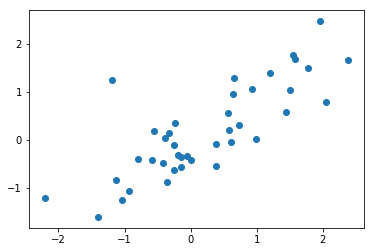

In [37]:
# Create a syhtetic sample
correlation = 0.8 # Suppose we don't know the true correlation 
corr_matrix = np.array([[1,correlation],[correlation,1]]) # Generate correlation matrix
JND = np.matmul(np.linalg.cholesky(corr_matrix),norm.rvs(size = [2,40])) # Generate correlated Joint Normal Distribution
plt.scatter(JND[0],JND[1])

In [39]:
# Calculate the Pearson correlation between the two sample
stats.pearsonr(JND[0],JND[1])

(0.7971137463047764, 7.52271625442287e-10)

The first value of the output gives the correlation between the two random variables and the second value gives the p-value. The correlation tells us that the two random variables are highly correlated. It is significant (=not zero) by the p-value. 

In [40]:
# Calculate the Spearman correlation between the two sample
stats.spearmanr(JND[0],JND[1])

SpearmanrResult(correlation=0.7729831144465292, pvalue=5.0637307367773385e-09)

We add ouliers to the series:

In [56]:
JND_0 = list(JND[0])
JND_1 = list(JND[1])
JND_0.append(7)
JND_1.append(1.5)
JND_0.append(-2)
JND_1.append(-7)

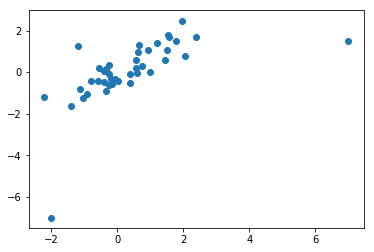

In [57]:
plt.scatter(JND_0,JND_1)

In [58]:
stats.pearsonr(JND_0,JND_1)

(0.626213526345118, 9.176511201349028e-06)

In [59]:
stats.spearmanr(JND_0,JND_1)

SpearmanrResult(correlation=0.8009885746697998, pvalue=1.8912289186324278e-10)

We can clearly see that the Pearson correlation has been strongly affected by the outliers. It changes to 0.626 from 0.797.<br> The Spearman correlation did not get affected much. It is based on the order rather than the actual value. 

<hr>

<div style="font-size:14pt" font-weight="bold">2.5 The F distribution</div>
<br>
the F-distribution, also known as Snedecor's F distribution is a continuous probability distribution that is often used in the analysis of variance (ANOVA). A random variable form F distribution can be written as follows:

\begin{equation}
 X= \frac{s_1^2 /\sigma_1^2}{s_2^2 / \sigma_2^2}
\end{equation}
<br>
where $s_1^2$ and $s_2^2$ are the sums of squares $S_1^2$ and $S_2^2$ from two normal processes with variances $\sigma_1^2$ and $\sigma_2^2$ divided by the corresponding number of $\chi^2$ degrees of freedom, d1 and d2 respectively.
<br>
reference: https://en.wikipedia.org/wiki/F-distribution

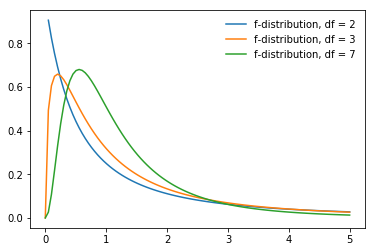

In [115]:
# generate x values
x = np.linspace(0,5,100)

# Create f distibution object with digree of freedom = 2,3,7
df_f2 = stats.f(2,2)
df_f3 = stats.f(3,3)
df_f7= stats.f(7,7)

# Draw the pdf of pdf of f-distribuion 
plt.plot(x, df_f2.pdf(x), label = "f-distribution, df = 2")
plt.plot(x, df_f3.pdf(x), label = "f-distribution, df = 3")
plt.plot(x, df_f7.pdf(x), label = "f-distribution, df = 7")
plt.legend(loc='best', frameon=False)

<hr>

<div style="font-size:14pt" font-weight="bold">2.6 The chi-squared distribution</div>
<br>
If $X_1, X_2, \cdot\cdot\cdot,X_m $ are independent and identically distributed(i.i.d.) and normallly distributed, Y in the following formula has $\chi^2$ distribution.
<br>

\begin{equation}
 Y = \sum_{i=1}^n X_i^2 \: \sim \chi_n^2
\end{equation}

where n is the defree of freedom.

<br>
A chi-squared test, also written as $\chi^2$ test, is an statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution when the null hypothesis is true.

<br> 
<hr>
<div style="font-size:14pt" font-weight="bold">2.6.2 The chi-squared goodness of fit test</div>
<br>
The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies. We test the following:

\begin{equation}
 Y = \sum_{i=1}^n \frac{(O_i - E_i)^2}{E_i} \: \sim \chi_{n-1}^2
\end{equation}

where $E_i$ is the expected outcome and $O_i$ is an observed sample outcome.<br>
Suppose we roll a a fair dice 360 times and observed the folowing distribution:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>

<table class="tg">
  <tr>
    <th class="tg-0pky">Outcome</th>
    <th class="tg-0pky">Expected distributon</th>
    <th class="tg-0pky">Sample distributon</th>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">60</td>
    <td class="tg-0pky">56</td>  
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">60</td>
    <td class="tg-0pky">64</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">60</td>
    <td class="tg-0pky">58</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">60</td>  
    <td class="tg-0pky">57</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">60</td>  
    <td class="tg-0pky">62</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">60</td>
    <td class="tg-0pky">63</td>  
  </tr>
</table>
<br>

Null Hypothesis $H_0: p_1 =  \cdot \cdot \cdot = p_6 = \frac{1}{6}$<br> 
Alternative Hypothesis $H_1: $ At least one of them is not $\frac{1}{6}$<br> 
Significance level $\alpha = 0.05$

<br>

reference: https://en.wikipedia.org/wiki/Chi-squared_test 


In [5]:
observed_dist = np.array([56,64,58,57,62,63])
expected_dist = np.ones(6)*60
print("Sample: ", observed_dist)
print("Expected: ", expected_dist)

Sample:  [56 64 58 57 62 63]
Expected:  [60. 60. 60. 60. 60. 60.]


In [6]:
stats.chisquare(observed_dist, expected_dist)

Power_divergenceResult(statistic=0.9666666666666667, pvalue=0.9652092806421372)

The first value is the chi-square value and the second value is the p-value, which is greater than 0.05.<br> We can passively accept the null hypothesis and conclude the sample distribution is similar to the expected ditribution. 

In [9]:
ch2=np.array([(x-y)**2/y for x, y in zip(observed_dist,expected_dist)])
1-stats.chi2.cdf(ch2.sum(),5) 

0.9448773650021219

<div style="font-size:14pt" font-weight="bold">2.6.3 The chi-squared test of independence</div>
<br>
The chi-square test of independence is a test to determine whether two categorical variables are independent.<br>
Suppose we have the following blood type data by gender. We want to know whether the two categorical variables are independent or not.<br>

</style>

<table class="tg">
  <tr>
    <th class="tg-0pky">Gender/Blood Type</th>
    <th class="tg-0pky">A</th>
    <th class="tg-0pky">O</th>
    <th class="tg-0pky">B</th>
    <th class="tg-0pky">AB</th>
    <th class="tg-0pky">total</th>  
  </tr>
  <tr>
    <th class="tg-0pky">Male: </th>
    <th class="tg-0pky">56</th>
    <th class="tg-0pky">20</th>
    <th class="tg-0pky">16</th>
    <th class="tg-0pky">8</th>
    <th class="tg-0pky">100</th>  
  </tr>
  <tr>
    <th class="tg-0pky">Female: </th>
    <th class="tg-0pky">45</th>
    <th class="tg-0pky">28</th>
    <th class="tg-0pky">22</th>
    <th class="tg-0pky">5</th>
    <th class="tg-0pky">100</th>  
  </tr>
</table>
<br>

Null Hypothesis $H_0: $ Gender and blood type are independent<br> 
Alternative Hypothesis $H_1: $ Gender and blood type are not independent<br> 
Significance level $\alpha = 0.05$

<br>


In [2]:
bt_data = [[56,20,16,8],[45,28,22,5]]
bt_data

[[56, 20, 16, 8], [45, 28, 22, 5]]

In [6]:
# if the Chi^2 statistics is greater than this value, the null hypothesis is rejected
stats.distributions.chi2.ppf(0.95,3)  # alpha = 0.05, df = 3

7.814727903251179

In [3]:
stats.chi2_contingency(bt_data) 

(4.171029248673856, 0.24357845967499242, 3, array([[50.5, 24. , 19. ,  6.5],
        [50.5, 24. , 19. ,  6.5]]))

The $\chi^2$ statistics(4.171) is less than the 95% $\chi^2$ value(7.815), which means we cannot reject the null hypothesis.

In [5]:
1.0 - stats.distributions.chi2.cdf(4.171,3)

0.24358142050030052

The first value is the chi-square value and the second value is the p-value.
<br>The p-value is greater than $\alpha = 0.05$,  which means that we cannot reject the null hypothesis. The blood type and gender are independent.

<hr>

<div style="font-size:14pt" font-weight="bold">2.7 Analysis of Variance(ANOVA)</div>
<br>
Analysis of Variance (ANOVA) is testing the differences between means of three or more series fo data. It compares the means between groups and determines whether any of these means are significantly different from each other:
<br><br>
Null Hypothesis $H_0: \mu_1 = \mu_2 = \cdot \cdot \cdot \mu_n$<br>
Alternative Hypothesis $H_1: $ At least one of them has a different mean from others.<br>

We compare the variance inside the group with the mean variance between the different groups. This statistics is called F-statistics. It has a F-distribution.

Suppose we have test scores from three different schools and want to see if their scores are significantly different from the others.

In [22]:
# Generate synthetic test scores with differen means
school_a = np.random.normal(65,5,size=90)
school_b = np.random.normal(70,10,size=60)
school_c = np.random.normal(80,15,size=80)

F_onewayResult(statistic=54.993836956037654, pvalue=3.3476804158880856e-20)


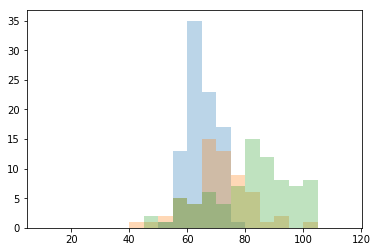

In [23]:
bins = np.arange(10,120,5)
plt.hist(school_a, bins=bins, alpha=0.3)
plt.hist(school_b, bins=bins, alpha=0.3)
plt.hist(school_c, bins=bins, alpha=0.3)
result = stats.f_oneway(school_a,school_b,school_c)
print(result)
plt.show()

The p-value is less than 0.05, which means we can reject the null hypothesis and there is a difference between the groups.

<hr>

In [24]:
# Generate synthetic test scores with the same mean
school_a = np.random.normal(70,5,size=90)
school_b = np.random.normal(70,10,size=60)
school_c = np.random.normal(70,15,size=80)

F_onewayResult(statistic=1.7103663587929039, pvalue=0.18312114316675027)


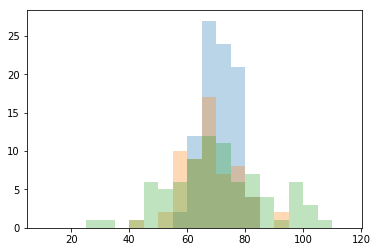

In [25]:
bins = np.arange(10,120,5)
plt.hist(school_a, bins=bins, alpha=0.3)
plt.hist(school_b, bins=bins, alpha=0.3)
plt.hist(school_c, bins=bins, alpha=0.3)
result = stats.f_oneway(school_a,school_b,school_c)
print(result)
plt.show()

The p-value is greater than 0.05, which means we can not reject the null hypothesis and the groups has the same mean.

<hr>